# Preparing Data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Reading our data
df = pd.read_csv("Social_Network_Ads.csv")
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [3]:
# Encoding 'Gender' column to binary to match the data
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
# Drop useless labels 'User ID'
df = df.drop('User ID', axis=1)
print(df)

     Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       0   46            41000          1
396       1   51            23000          1
397       0   50            20000          1
398       1   36            33000          0
399       0   49            36000          1

[400 rows x 4 columns]


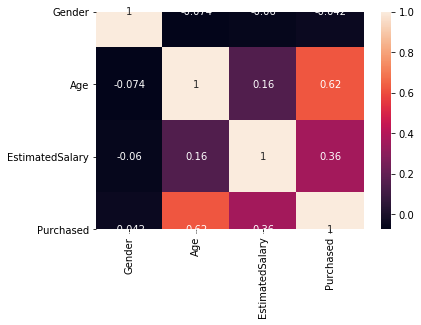

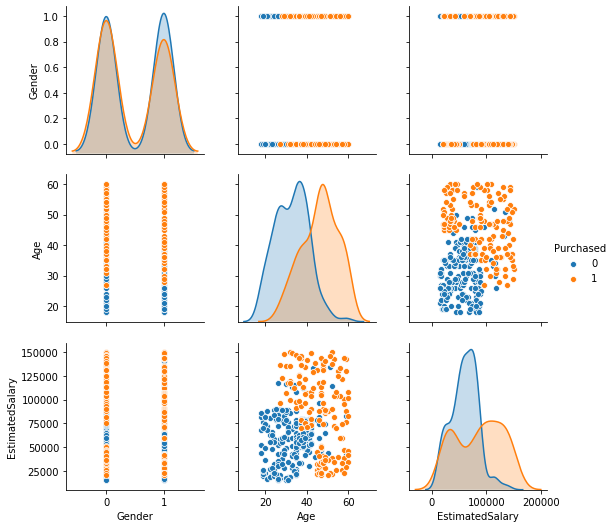

In [4]:
# show the heat map of our data and the relation between 'Purchased' and other labels
sns.heatmap(df.corr(), annot=True)
sns.pairplot(df, vars=df.columns[:-1], hue="Purchased")

In [5]:
# Set instanses 'x' and label 'y'
x = df.drop('Purchased', axis=1)
y = df['Purchased']
# Set 30% of dataSet as Testing data and 70% as Training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=5)

# Decision Tree

# Classification

In [6]:
from sklearn import tree
d_tree1 = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
d_tree1 = d_tree1.fit(x, y)

In [7]:
preds1 = d_tree1.predict(x)

In [8]:
accuracy_score(y,preds1)

0.915

# Regression

In [9]:
d_tree2 = tree.DecisionTreeRegressor(random_state=0, max_depth=4)
d_tree2 = d_tree2.fit(x, y)

In [10]:
preds2 = d_tree2.predict(x)

In [11]:
from sklearn.metrics import r2_score
r2_score(y,preds2)

0.7733096903187513